# Validation against Wawrik et al. 2009

This notebook compares metaSIPSim simulation results against those of Wawrik et al. 2009. Comparisons are made to figure 3B from said paper.

For the simulation, I will be generating fragments only. I will estimate the amount of DNA from each genome in each fraction by multiplying fragment size by simulated abundance then summing within each genome.

Wawrik, B., Callaghan, A. V., & Bronk, D. A. (2009). Use of Inorganic and Organic Nitrogen by Synechococcus spp. and Diatoms on the West Florida Shelf as Measured Using Stable Isotope Probing. Applied and Environmental Microbiology, 75(21), 6662–6670. DOI:10.1128/AEM.01002-09


## Intitiation

In [1]:
import os
import pandas as pd
import ConfigParser
import rpy2.ipython

In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(dplyr)
library(ggplot2)

/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


In [4]:
# What is your working directory?
workdir = '/home/sam/data/SIPSim2_data/dev/validation/Wawrik2009/'

# Where are your genomes?
genomedir = '/home/sam/data/SIPSim2_data/dev/validation/Wawrik2009/genomes/'



In [5]:
# making directories
## working directory
if not os.path.isdir(workdir):
    os.makedirs(workdir)
%cd $workdir

## genome directory
if not os.path.isdir(genomedir):
    os.makedirs(genomedir)
print(genomedir)

/home/sam/data/SIPSim2_data/dev/validation/Wawrik2009
/home/sam/data/SIPSim2_data/dev/validation/Wawrik2009/genomes/


## Part 1: Get genomes

In [6]:
%cd $genomedir
# The genomes you want are:
## Synechococcus_sp_WH7803: GCF_000063505.1


!wget -O Synechococcus_sp_WH7803.fna.gz ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/063/505/GCF_000063505.1_ASM6350v1/GCF_000063505.1_ASM6350v1_genomic.fna.gz

!gunzip Synechococcus_sp_WH7803.fna.gz


/home/sam/data/SIPSim2_data/dev/validation/Wawrik2009/genomes
--2019-05-22 13:09:36--  ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/063/505/GCF_000063505.1_ASM6350v1/GCF_000063505.1_ASM6350v1_genomic.fna.gz
           => ‘Synechococcus_sp_WH7803.fna.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 2607:f220:41e:250::10
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /genomes/all/GCF/000/063/505/GCF_000063505.1_ASM6350v1 ... done.
==> SIZE GCF_000063505.1_ASM6350v1_genomic.fna.gz ... 694327
==> PASV ... done.    ==> RETR GCF_000063505.1_ASM6350v1_genomic.fna.gz ... done.
Length: 694327 (678K) (unauthoritative)

GCF_000063505.1_ASM 100%[===================>] 678.05K  --.-KB/s    in 0.07s   

2019-05-22 13:09:37 (8.92 MB/s) - ‘Synechococcus_sp_WH7803.fna.gz’ saved [694327]



## Part 2: Simulation

### A) Get genome indexes

In [7]:
%cd $workdir

/home/sam/data/SIPSim2_data/dev/validation/Wawrik2009


In [8]:
# make index file of genomes 
!ls $genomedir | grep ".fna" > genome_files.txt
!tail genome_files.txt

Synechococcus_sp_WH7803.fna


In [9]:
with open("genome_files.txt", 'r') as genome_files, open ("genome_index.txt", 'w') as genome_index:
    genomes = genome_files.readlines()
    for line in genomes:
        fasta = line
        taxa = fasta.replace('.fna\n', '\t')
        genome_index.write(taxa + fasta)
!cat genome_index.txt

Synechococcus_sp_WH7803	Synechococcus_sp_WH7803.fna


### B) Set up experimental design

#### List of incorporators
In this case Synechococcus_sp_WH7803 will be 100% incorporating in library 2

In [10]:
library = [2]

taxon_name = ['Synechococcus_sp_WH7803'] 

percent_incorporation = [100.0]

sd_incorporation = [0]

incorporators = pd.DataFrame({'taxon_name':taxon_name, 'library':library, 
                       'percent_incorporation':percent_incorporation, 'sd_incorporation':sd_incorporation})
incorporators = incorporators.reindex(columns = ['taxon_name', 'library', 'percent_incorporation', 'sd_incorporation'])
incorporators.to_csv("incorporators.txt", sep='\t', index=False)

!cat incorporators.txt

taxon_name	library	percent_incorporation	sd_incorporation
Synechococcus_sp_WH7803	2	100.0	0


#### Community composition file
Cultures were isolates so they have a relative abundance of 100%

In [11]:
library = [1, 2]

taxon_name = ['Synechococcus_sp_WH7803', 'Synechococcus_sp_WH7803'] 

rel_abund_perc = [100.0, 100.0]

rank = [1,2]

comm = pd.DataFrame({'library':library, 'taxon_name':taxon_name, 
                       'rel_abund_perc':rel_abund_perc, 'rank':rank})
comm = comm.reindex(columns = ['library', 'taxon_name', 'rel_abund_perc', 'rank'])
comm.to_csv("comm.txt", sep='\t', index=False)

!cat comm.txt

library	taxon_name	rel_abund_perc	rank
1	Synechococcus_sp_WH7803	100.0	1
2	Synechococcus_sp_WH7803	100.0	2


#### Generate fraction file
These fractions are estimated from the paper figure

In [12]:
%%R
fractions = read.table('/home/sam/data/SIPSim2_data/dev/validation/figure_estimates.txt', 
                          header=TRUE, sep="\t") %>%
    filter(Study == "Wawrik2009") %>%
    mutate(BD = round(BD, digits=3)) %>%
    select(library, BD, fraction) %>%
    group_by(library) %>%
    mutate(last_frac = max(fraction)) %>%
    ungroup()
for (i in 1:nrow(fractions)){
    fractions$BD_prev[i] = fractions$BD[i-1]
    fractions$BD_next[i] = fractions$BD[i+1]
    if (fractions$fraction[i] == 1){
        fractions$BD_prev[i] = (2*fractions$BD[i])-fractions$BD_next[i]
    }
    if (fractions$fraction[i] == fractions$last_frac[i]){
        fractions$BD_next[i] = (2*fractions$BD[i])-fractions$BD_prev[i]
    }
}
fractions = fractions %>%
    mutate(BD_min = (BD+BD_prev)/2, BD_max = (BD+BD_next)/2) %>%
    mutate(fraction_size = round(BD_max-BD_min, 4)) %>%
    select(library, fraction, BD_min, BD_max, fraction_size)
write.table(fractions, "fracs.txt", quote=F, sep="\t", row.names=F)

In [13]:
!cat fracs.txt

library	fraction	BD_min	BD_max	fraction_size
1	1	1.687	1.693	0.006
1	2	1.693	1.6975	0.0045
1	3	1.6975	1.7005	0.003
1	4	1.7005	1.704	0.0035
1	5	1.704	1.708	0.004
1	6	1.708	1.712	0.004
1	7	1.712	1.7165	0.0045
1	8	1.7165	1.721	0.0045
1	9	1.721	1.725	0.004
1	10	1.725	1.7295	0.0045
1	11	1.7295	1.7345	0.005
1	12	1.7345	1.739	0.0045
1	13	1.739	1.7425	0.0035
1	14	1.7425	1.7455	0.003
2	1	1.687	1.693	0.006
2	2	1.693	1.6965	0.0035
2	3	1.6965	1.698	0.0015
2	4	1.698	1.7005	0.0025
2	5	1.7005	1.704	0.0035
2	6	1.704	1.7075	0.0035
2	7	1.7075	1.7105	0.003
2	8	1.7105	1.713	0.0025
2	9	1.713	1.7155	0.0025
2	10	1.7155	1.718	0.0025
2	11	1.718	1.7235	0.0055
2	12	1.7235	1.73	0.0065
2	13	1.73	1.7335	0.0035
2	14	1.7335	1.7365	0.003
2	15	1.7365	1.74	0.0035
2	16	1.74	1.7445	0.0045
2	17	1.7445	1.7495	0.005
2	18	1.7495	1.755	0.0055
2	19	1.755	1.761	0.006


### C) Make configuration file for simulation
This configuration file contains all the information needed for simulation. Gradient configuration is based on the methods section.

In [14]:
config = ConfigParser.SafeConfigParser()

## Other parameters
config.add_section('Other')
config.set('Other', 'temp_directory', './tmp')
config.set('Other', 'threads', '1')
config.set('Other', 'logfile', 'SIPSim2_Wawrik.log')
config.set('Other', 'endpoint', 'fragment_list')

## Library parameters
config.add_section('Library')
config.set('Library', 'library_list', '1, 2')
config.set('Library', 'window_or_fraction', 'fraction')

## Fragment parameters
config.add_section('Fragment')
config.set('Fragment', 'path_to_SIPSim', '/home/sam/notebooks/SIPSim')
config.set('Fragment', 'genome_index_file', 'genome_index.txt')
config.set('Fragment', 'genomeDir', genomedir)
config.set('Fragment', 'frag_length_distribution', 'skewed-normal,9000,2500,-5')
config.set('Fragment', 'coverage_of_fragments', '100')
config.set('Fragment', 'fragment_file', 'frags.txt')
config.set('Fragment', 'temp_fragment_file', 'tmp.frags')
config.set('Fragment', 'number_of_iterations', '1')


## Gradient parameters
config.add_section('Gradient')
config.set('Gradient', 'temperature', '293.15')
config.set('Gradient', 'avg_density', '1.701')
config.set('Gradient', 'angular_velocity', '16860743')
config.set('Gradient', 'min_rotation_radius', '7.47')
config.set('Gradient', 'max_rotation_radius', '8.79')
config.set('Gradient', 'tube_angle', '0')
config.set('Gradient', 'tube_radius', '0.66')
config.set('Gradient', 'tube_height', '4.7')
config.set('Gradient', 'fraction_frag_in_DBL', '0.001')
config.set('Gradient', 'isotope', 'N')

## Model parameters
config.add_section('Model')
config.set('Model', 'min_bouyant_density', '1.67')
config.set('Model', 'max_bouyant_density', '1.775')
config.set('Model', 'bouyant_density_step', '0.0001')
config.set('Model', 'fraction_table_file', 'fracs.txt')

## Community parameters
config.add_section('Community')
config.set('Community', 'community_file', 'comm.txt')
config.set('Community', 'incorporator_file', 'incorporators.txt')

## Sequencing parameters
config.add_section('Sequencing')
config.set('Sequencing', 'number_of_genomes_per_iteration', '1')


# Writing our configuration file to 'example.cfg'
with open('simulation_parameters.cfg', 'wb') as configfile:
    config.write(configfile)

### D) Simulate fragments for each fraction
Use the function SIPSim2_get_fragment_list_fractions.py to get the fragments for each genome in each fraction of every library

In [15]:
!python /home/sam/notebooks/SIPSim_metagenome/bin/SIPSim_metagenome.py simulation_parameters.cfg

Running SIPSim_metagenome
This program was writen by Samuel Barnett (seb369@cornell.edu)

This run was started on 22/05/19 at 13:10:17


You have chosen to get an list of simulated SIP metagenome fragments with adjusted buoyant densities.
You have selected to simulate metagenome sequences for each fraction.

Your community abundance file is: comm.txt

Your incorporator assignment file is: incorporators.txt

You are simulating with the isotope of N

It took 0.734 seconds to get these models.
It took 0.792 seconds to get these models.

Building fragments

It took 12.16 seconds to build the fragments

----------

Starting library 1

Starting library 1 fraction 1 BD:1.687-1.693
Writing fragments to file
It took 13.135 seconds to write fragment file.
It took 13.136 seconds to run library 1 fraction BD:1.687-1.693 iteration 1

It took 13.136 seconds to run the library 1 fraction 1 BD:1.687-1.693

Starting library 1 fraction 2 BD:1.693-1.6975
Writing fragments to file
It took 12.609 seconds t

Writing fragments to file
It took 12.948 seconds to write fragment file.
It took 193.892 seconds to run library 2 fraction BD:1.7365-1.74 iteration 1

It took 12.948 seconds to run the library 2 fraction 15 BD:1.7365-1.74

Starting library 2 fraction 16 BD:1.74-1.7445
Writing fragments to file
It took 13.058 seconds to write fragment file.
It took 206.951 seconds to run library 2 fraction BD:1.74-1.7445 iteration 1

It took 13.059 seconds to run the library 2 fraction 16 BD:1.74-1.7445

Starting library 2 fraction 17 BD:1.7445-1.7495
Writing fragments to file
It took 12.917 seconds to write fragment file.
It took 219.869 seconds to run library 2 fraction BD:1.7445-1.7495 iteration 1

It took 12.918 seconds to run the library 2 fraction 17 BD:1.7445-1.7495

Starting library 2 fraction 18 BD:1.7495-1.755
Writing fragments to file
It took 13.068 seconds to write fragment file.
It took 232.938 seconds to run library 2 fraction BD:1.7495-1.755 iteration 1

It took 13.069 seconds to run the 

## Part 3: Original SIPSim simulation

Compare SIPSim_metagenome to SIPSim

In [16]:
%cd $workdir

/home/sam/data/SIPSim2_data/dev/validation/Wawrik2009


Modify the comm.txt file so that you include both genomes

In [17]:
%%bash
echo -e "library\ttaxon_name\trel_abund_perc\trank" > comm2.txt
echo -e "1\tSynechococcus_sp_WH7803\t100.0\t1" >> comm2.txt
echo -e "2\tSynechococcus_sp_WH7803\t100.0\t1" >> comm2.txt


cat comm2.txt

library	taxon_name	rel_abund_perc	rank
1	Synechococcus_sp_WH7803	100.0	1
2	Synechococcus_sp_WH7803	100.0	1


### 1) Get fragments

In [18]:
!SIPSim fragments \
    genome_index.txt \
    --fp $genomedir/ \
    --fld skewed-normal,9000,2500,-5 \
    --flr None,None \
    --nf 100X \
    --tbl \
    --np 20 \
    2> Wawrik_SIPsim.log \
    > Wawrik_SIPsim.txt
!cat Wawrik_SIPsim.log

DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
Processing: "Synechococcus_sp_WH7803"
  Genome name: Synechococcus_sp_WH7803
  Genome length (bp): 2366980
  Number of amplicons: None
  Number of fragments simulated: 33621


### 2) Convert to 2d-KDE format

In [19]:
!SIPSim fragment_KDE \
    Wawrik_SIPsim.txt \
    > Wawrik_SIPsim_kde.pkl
    
!ls -thlc Wawrik_SIPsim_kde.pkl

DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
-rw-rw-r-- 1 sam sam 527K May 22 13:22 Wawrik_SIPsim_kde.pkl


### 3) Add diffusion

In [20]:
!SIPSim diffusion \
    Wawrik_SIPsim_kde.pkl \
    --np 20 \
    > Wawrik_SIPsim_kde_dif.pkl

!ls -thlc Wawrik_SIPsim_kde_dif.pkl

DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
Index size: 90508
Processing: Synechococcus_sp_WH7803
-rw-rw-r-- 1 sam sam 3.9M May 22 13:22 Wawrik_SIPsim_kde_dif.pkl


### 4) Add diffusive boundery layer

In [21]:
!SIPSim DBL \
    Wawrik_SIPsim_kde_dif.pkl \
    --np 20 \
    -D 1.701 \
    -w 16860743 \
    --tube_height 4.7 \
    --r_min 7.47 \
    --r_max 8.79 \
    --vertical \
    > Wawrik_SIPsim_kde_dif_DBL.pkl


!ls -thlc Wawrik_SIPsim_kde_dif_DBL.pkl

DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]
DBL_index file written: "DBL_index.txt"
Processing: Synechococcus_sp_WH7803
-rw-rw-r-- 1 sam sam 3.9M May 22 13:22 Wawrik_SIPsim_kde_dif_DBL.pkl


### 5) Add isotope incorporation

In [22]:
!cat incorporators.txt

taxon_name	library	percent_incorporation	sd_incorporation
Synechococcus_sp_WH7803	2	100.0	0


In [23]:
%%bash
SIPSim incorp_config_example \
  --percTaxa 100 \
  --percIncorpMean 100 \
  --percIncorpSD 0 \
  --n_reps 1 \
  > incorp.config
  
cat incorp.config


[1]
    # baseline: no incorporation
    treatment = control
    
    [[intraPopDist 1]]
        distribution = uniform
        
        [[[start]]]
            
            [[[[interPopDist 1]]]]
                distribution = uniform
                start = 0
                end = 0
        
        [[[end]]]
            
            [[[[interPopDist 1]]]]
                distribution = uniform
                start = 0
                end = 0
[2]
    # 'treatment' community: possible incorporation
    treatment = labeled
    max_perc_taxa_incorp = 100
    
    [[intraPopDist 1]]
        distribution = normal
        [[[mu]]]
            [[[[interPopDist 1]]]]
                start = 100
                distribution = uniform
                end = 100
        [[[sigma]]]
            [[[[interPopDist 1]]]]
                start = 0
                distribution = uniform
                end = 0
    


DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2


Make file identifying incorporators for each library

In [24]:
%%bash
echo -e "1\n2\tSynechococcus_sp_WH7803\n" > incorp_taxa.txt

cat incorp_taxa.txt


1
2	Synechococcus_sp_WH7803



Add isoptope incorporation

In [25]:
!SIPSim isotope_incorp \
    --comm comm2.txt \
    --taxa incorp_taxa.txt \
    --isotope 15N \
    --np 20 \
    Wawrik_SIPsim_kde_dif_DBL.pkl \
    incorp.config \
    > Wawrik_SIPsim_kde_dif_DBL_inc.pkl

!ls -thlc Wawrik_SIPsim_kde_dif_DBL_inc.pkl 
!cat BD-shift_stats.txt

DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
Loading KDE object...
Processing library: 1
Processing: Synechococcus_sp_WH7803
Processing library: 2
Processing: Synechococcus_sp_WH7803
File written: BD-shift_stats.txt
-rw-rw-r-- 1 sam sam 7.7M May 22 13:22 Wawrik_SIPsim_kde_dif_DBL_inc.pkl
library	taxon	min	q25	mean	median	q75	max
1	Synechococcus_sp_WH7803	0.0	0.0	0.0	0.0	0.0	0.0
2	Synechococcus_sp_WH7803	0.0159999999999	0.016	0.016	0.016	0.016	0.016


### 6) Making OTU table


Get fraction table for each library

In [26]:
!cat fracs.txt

library	fraction	BD_min	BD_max	fraction_size
1	1	1.687	1.693	0.006
1	2	1.693	1.6975	0.0045
1	3	1.6975	1.7005	0.003
1	4	1.7005	1.704	0.0035
1	5	1.704	1.708	0.004
1	6	1.708	1.712	0.004
1	7	1.712	1.7165	0.0045
1	8	1.7165	1.721	0.0045
1	9	1.721	1.725	0.004
1	10	1.725	1.7295	0.0045
1	11	1.7295	1.7345	0.005
1	12	1.7345	1.739	0.0045
1	13	1.739	1.7425	0.0035
1	14	1.7425	1.7455	0.003
2	1	1.687	1.693	0.006
2	2	1.693	1.6965	0.0035
2	3	1.6965	1.698	0.0015
2	4	1.698	1.7005	0.0025
2	5	1.7005	1.704	0.0035
2	6	1.704	1.7075	0.0035
2	7	1.7075	1.7105	0.003
2	8	1.7105	1.713	0.0025
2	9	1.713	1.7155	0.0025
2	10	1.7155	1.718	0.0025
2	11	1.718	1.7235	0.0055
2	12	1.7235	1.73	0.0065
2	13	1.73	1.7335	0.0035
2	14	1.7335	1.7365	0.003
2	15	1.7365	1.74	0.0035
2	16	1.74	1.7445	0.0045
2	17	1.7445	1.7495	0.005
2	18	1.7495	1.755	0.0055
2	19	1.755	1.761	0.006


In [27]:
!SIPSim OTU_table \
    --np 1 \
    --abs 1e5 \
    Wawrik_SIPsim_kde_dif_DBL_inc.pkl \
    comm2.txt \
    fracs.txt \
    > Wawrik_SIPsim_OTU.txt
    
!cat Wawrik_SIPsim_OTU.txt

DEBUG:CACHEDIR=/home/sam/.cache/matplotlib
DEBUG:Using fontManager instance from /home/sam/.cache/matplotlib/fontList.json
DEBUG:backend agg version v2.2
Loading files...
Simulating OTUs...
Processing library: "1"
  Processing taxon: "Synechococcus_sp_WH7803"
   taxon abs-abundance:  100000
Processing library: "2"
  Processing taxon: "Synechococcus_sp_WH7803"
   taxon abs-abundance:  100000
library	taxon	fraction	BD_min	BD_mid	BD_max	count	rel_abund
1	Synechococcus_sp_WH7803	-inf-1.687	-inf	1.686	1.686	29	1
1	Synechococcus_sp_WH7803	1.687-1.693	1.687	1.69	1.693	25	1
1	Synechococcus_sp_WH7803	1.693-1.698	1.693	1.696	1.698	119	1
1	Synechococcus_sp_WH7803	1.698-1.700	1.698	1.699	1.7	211	1
1	Synechococcus_sp_WH7803	1.700-1.704	1.7	1.702	1.704	628	1
1	Synechococcus_sp_WH7803	1.704-1.708	1.704	1.706	1.708	1547	1
1	Synechococcus_sp_WH7803	1.708-1.712	1.708	1.71	1.712	3882	1
1	Synechococcus_sp_WH7803	1.712-1.716	1.712	1.714	1.716	17619	1
1	Synechococcus_sp_WH7803	1.716-1.721	1.716	1.719	1.721	

## Part 3: Analysis

Now I'll see how well the simulation results correspond with the actual DNA distribution. Here we will also make easier to handle files for nice visualizationg in R.

### Get Wawrik data

Also make a dataframe that indicates teh isotope for each reference in each library. This gives a bit more metadata that you can use when plotting

In [28]:
%%R
real.df = read.table('/home/sam/data/SIPSim2_data/dev/validation/figure_estimates.txt', 
                          header=TRUE, sep="\t") %>%
    filter(Study == "Wawrik2009") %>%
    mutate(BD = round(BD, digits=3), data_type = "empirical") %>%
    select(taxon_name, Isotope, library, BD, Ratio_of_maximum, data_type, Study)

real.df

                taxon_name Isotope library    BD Ratio_of_maximum data_type
1  Synechococcus_sp_WH7803     14N       1 1.690          0.01111 empirical
2  Synechococcus_sp_WH7803     14N       1 1.696          0.01728 empirical
3  Synechococcus_sp_WH7803     14N       1 1.699          0.01728 empirical
4  Synechococcus_sp_WH7803     14N       1 1.702          0.00494 empirical
5  Synechococcus_sp_WH7803     14N       1 1.706          0.04568 empirical
6  Synechococcus_sp_WH7803     14N       1 1.710          0.21111 empirical
7  Synechococcus_sp_WH7803     14N       1 1.714          0.94198 empirical
8  Synechococcus_sp_WH7803     14N       1 1.719          1.00000 empirical
9  Synechococcus_sp_WH7803     14N       1 1.723          0.14815 empirical
10 Synechococcus_sp_WH7803     14N       1 1.727          0.04938 empirical
11 Synechococcus_sp_WH7803     14N       1 1.732          0.01852 empirical
12 Synechococcus_sp_WH7803     14N       1 1.737          0.00494 empirical
13 Synechoco

In [29]:
%%R
metadata = real.df %>%
    select(taxon_name, Isotope, library, Study) %>%
    unique
metadata

                taxon_name Isotope library      Study
1  Synechococcus_sp_WH7803     14N       1 Wawrik2009
15 Synechococcus_sp_WH7803     15N       2 Wawrik2009


### metaSIPSim data
Get the metaSIPSim simulated data and estimate the concentration of DNA from each reference as a ratio to the maximum concentration.

In [30]:
frag_table = pd.DataFrame(columns=['taxon_name', 'library', 'OriBD', 
                                   'percent_incorp', 'abundance',
                                   'fragment_start', 'fragment_length'])
for file in os.listdir(workdir):
    if file.endswith('fragments.txt.gz'):
        fraction = file.split('_')[3]
        frag_table_sub = pd.read_table(file, compression='gzip')
        frag_table_sub['fraction'] = fraction
        frag_table = frag_table.append(frag_table_sub, ignore_index=True)
        
frag_table.to_csv('allfragments.txt', sep='\t', index=False)
frag_table = None

In [31]:
%%R
frag.df = read.delim('allfragments.txt') %>%
    filter(abundance > 0)

head(frag.df)

     OriBD   abundance fraction fragment_length fragment_start library
1 1.720536 0.002145600        3            6053              0       1
2 1.720190 0.002137426        3            9502           6054       1
3 1.717661 0.002079615        3            8073          15557       1
4 1.718907 0.002107643        3            7528          23631       1
5 1.720051 0.002134159        3            7267          31160       1
6 1.720141 0.002136257        3            8801          38428       1
  percent_incorp                                                scaffoldID
1              0 NC_009481.1 Synechococcus WH7803 complete genome sequence
2              0 NC_009481.1 Synechococcus WH7803 complete genome sequence
3              0 NC_009481.1 Synechococcus WH7803 complete genome sequence
4              0 NC_009481.1 Synechococcus WH7803 complete genome sequence
5              0 NC_009481.1 Synechococcus WH7803 complete genome sequence
6              0 NC_009481.1 Synechococcus WH7803 com

In [32]:
%%R
taxa.df = frag.df %>%
    mutate(base_abundance = abundance*fragment_length) %>%
    group_by(taxon_name, fraction, library) %>%
    summarize(DNA_abundance = sum(base_abundance)) %>%
    as.data.frame
frag.df = NULL
taxa.df

                taxon_name fraction library DNA_abundance
1  Synechococcus_sp_WH7803        1       1  1.367830e+06
2  Synechococcus_sp_WH7803        1       2  1.218847e+06
3  Synechococcus_sp_WH7803        2       1  3.586450e+07
4  Synechococcus_sp_WH7803        2       2  7.109939e+05
5  Synechococcus_sp_WH7803        3       1  1.636552e+07
6  Synechococcus_sp_WH7803        3       2  3.047117e+05
7  Synechococcus_sp_WH7803        4       1  1.244773e+08
8  Synechococcus_sp_WH7803        4       2  5.078528e+05
9  Synechococcus_sp_WH7803        5       1  3.295307e+08
10 Synechococcus_sp_WH7803        5       2  7.109939e+05
11 Synechococcus_sp_WH7803        6       1  5.787100e+08
12 Synechococcus_sp_WH7803        6       2  7.109939e+05
13 Synechococcus_sp_WH7803        7       1  2.806422e+09
14 Synechococcus_sp_WH7803        7       2  3.320420e+06
15 Synechococcus_sp_WH7803        8       1  1.254372e+10
16 Synechococcus_sp_WH7803        8       2  2.923669e+07
17 Synechococc

In [33]:
%%R
fracs.df = read.delim('fracs.txt') %>%
    mutate(BD = (BD_min + BD_max)/2) %>%
    select(library, fraction, BD)
taxa.df = inner_join(taxa.df, fracs.df)
taxa.df

/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Joining, by = c("fraction", "library")

  warnings.warn(x, RRuntimeWarning)


                taxon_name fraction library DNA_abundance      BD
1  Synechococcus_sp_WH7803        1       1  1.367830e+06 1.69000
2  Synechococcus_sp_WH7803        1       2  1.218847e+06 1.69000
3  Synechococcus_sp_WH7803        2       1  3.586450e+07 1.69525
4  Synechococcus_sp_WH7803        2       2  7.109939e+05 1.69475
5  Synechococcus_sp_WH7803        3       1  1.636552e+07 1.69900
6  Synechococcus_sp_WH7803        3       2  3.047117e+05 1.69725
7  Synechococcus_sp_WH7803        4       1  1.244773e+08 1.70225
8  Synechococcus_sp_WH7803        4       2  5.078528e+05 1.69925
9  Synechococcus_sp_WH7803        5       1  3.295307e+08 1.70600
10 Synechococcus_sp_WH7803        5       2  7.109939e+05 1.70225
11 Synechococcus_sp_WH7803        6       1  5.787100e+08 1.71000
12 Synechococcus_sp_WH7803        6       2  7.109939e+05 1.70575
13 Synechococcus_sp_WH7803        7       1  2.806422e+09 1.71425
14 Synechococcus_sp_WH7803        7       2  3.320420e+06 1.70900
15 Synecho

In [34]:
%%R
max.abds = taxa.df %>%
    group_by(library, taxon_name) %>%
    summarize(max_DNA = max(DNA_abundance)) %>%
    as.data.frame

taxa.df = inner_join(taxa.df, max.abds) %>%
    mutate(Ratio_of_maximum = DNA_abundance/max_DNA)
taxa.df

/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Joining, by = c("taxon_name", "library")

  warnings.warn(x, RRuntimeWarning)


                taxon_name fraction library DNA_abundance      BD     max_DNA
1  Synechococcus_sp_WH7803        1       1  1.367830e+06 1.69000 12543722065
2  Synechococcus_sp_WH7803        1       2  1.218847e+06 1.69000  8949780562
3  Synechococcus_sp_WH7803        2       1  3.586450e+07 1.69525 12543722065
4  Synechococcus_sp_WH7803        2       2  7.109939e+05 1.69475  8949780562
5  Synechococcus_sp_WH7803        3       1  1.636552e+07 1.69900 12543722065
6  Synechococcus_sp_WH7803        3       2  3.047117e+05 1.69725  8949780562
7  Synechococcus_sp_WH7803        4       1  1.244773e+08 1.70225 12543722065
8  Synechococcus_sp_WH7803        4       2  5.078528e+05 1.69925  8949780562
9  Synechococcus_sp_WH7803        5       1  3.295307e+08 1.70600 12543722065
10 Synechococcus_sp_WH7803        5       2  7.109939e+05 1.70225  8949780562
11 Synechococcus_sp_WH7803        6       1  5.787100e+08 1.71000 12543722065
12 Synechococcus_sp_WH7803        6       2  7.109939e+05 1.7057

In [35]:
%%R
## Make dataframe that you can combine with original leuders data as well as SIPSim data. Write this to a file.
metaSIPSim.df = taxa.df %>%
    left_join(metadata, by=c("taxon_name", "library")) %>%
    mutate(data_type = "metaSIPSim") %>%
    select(taxon_name, Isotope, library, BD, Ratio_of_maximum, data_type, Study)

write.table(metaSIPSim.df, file="/home/sam/data/SIPSim2_data/dev/validation/Wawrik2009/sim_DNA_conc_metaSIPSim.txt", 
            quote=FALSE, sep="\t", col.names=TRUE, row.names=FALSE)

metaSIPSim.df

                taxon_name Isotope library      BD Ratio_of_maximum  data_type
1  Synechococcus_sp_WH7803     14N       1 1.69000     1.090450e-04 metaSIPSim
2  Synechococcus_sp_WH7803     15N       2 1.69000     1.361873e-04 metaSIPSim
3  Synechococcus_sp_WH7803     14N       1 1.69525     2.859159e-03 metaSIPSim
4  Synechococcus_sp_WH7803     15N       2 1.69475     7.944261e-05 metaSIPSim
5  Synechococcus_sp_WH7803     14N       1 1.69900     1.304678e-03 metaSIPSim
6  Synechococcus_sp_WH7803     15N       2 1.69725     3.404683e-05 metaSIPSim
7  Synechococcus_sp_WH7803     14N       1 1.70225     9.923471e-03 metaSIPSim
8  Synechococcus_sp_WH7803     15N       2 1.69925     5.674472e-05 metaSIPSim
9  Synechococcus_sp_WH7803     14N       1 1.70600     2.627057e-02 metaSIPSim
10 Synechococcus_sp_WH7803     15N       2 1.70225     7.944261e-05 metaSIPSim
11 Synechococcus_sp_WH7803     14N       1 1.71000     4.613543e-02 metaSIPSim
12 Synechococcus_sp_WH7803     15N       2 1.70575  

### Get SIPSim data

Get the SIPSim simulated data (OTU table) and estimate the DNA abundance for each reference as a ratio to the maximum abundance

In [36]:
%%R
SIPSim.df = read.delim('Wawrik_SIPsim_OTU.txt') %>%
    filter(BD_min != "-Inf", BD_max != "Inf") %>%
    select(library, taxon, BD_mid, count) %>%
    rename(BD=BD_mid, taxon_name = taxon)

SIPSim.df

   library              taxon_name    BD count
1        1 Synechococcus_sp_WH7803 1.690    25
2        1 Synechococcus_sp_WH7803 1.696   119
3        1 Synechococcus_sp_WH7803 1.699   211
4        1 Synechococcus_sp_WH7803 1.702   628
5        1 Synechococcus_sp_WH7803 1.706  1547
6        1 Synechococcus_sp_WH7803 1.710  3882
7        1 Synechococcus_sp_WH7803 1.714 17619
8        1 Synechococcus_sp_WH7803 1.719 41165
9        1 Synechococcus_sp_WH7803 1.723 27594
10       1 Synechococcus_sp_WH7803 1.728  6727
11       1 Synechococcus_sp_WH7803 1.732   406
12       1 Synechococcus_sp_WH7803 1.736    11
13       1 Synechococcus_sp_WH7803 1.740     5
14       2 Synechococcus_sp_WH7803 1.690     3
15       2 Synechococcus_sp_WH7803 1.695     3
16       2 Synechococcus_sp_WH7803 1.697     3
17       2 Synechococcus_sp_WH7803 1.699     1
18       2 Synechococcus_sp_WH7803 1.706    13
19       2 Synechococcus_sp_WH7803 1.709    44
20       2 Synechococcus_sp_WH7803 1.712    70
21       2 Sy

In [37]:
%%R
max_count = SIPSim.df %>%
    group_by(library, taxon_name) %>%
    summarize(max_count = max(count)) %>%
    as.data.frame

SIPSim.df = inner_join(SIPSim.df, max_count) %>%
    mutate(Ratio_of_maximum = count/max_count) %>%
    inner_join(metadata, by=c("taxon_name", "library")) %>%
    mutate(data_type = "SIPSim") %>%
    select(taxon_name, Isotope, library, BD, Ratio_of_maximum, data_type, Study)

write.table(SIPSim.df, file="/home/sam/data/SIPSim2_data/dev/validation/Wawrik2009/sim_DNA_conc_SIPSim.txt", 
            quote=FALSE, sep="\t", col.names=TRUE, row.names=FALSE)

SIPSim.df

/home/sam/anaconda3/envs/SIPSim2_py2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Joining, by = c("library", "taxon_name")

  warnings.warn(x, RRuntimeWarning)


                taxon_name Isotope library    BD Ratio_of_maximum data_type
1  Synechococcus_sp_WH7803     14N       1 1.690     6.073120e-04    SIPSim
2  Synechococcus_sp_WH7803     14N       1 1.696     2.890805e-03    SIPSim
3  Synechococcus_sp_WH7803     14N       1 1.699     5.125714e-03    SIPSim
4  Synechococcus_sp_WH7803     14N       1 1.702     1.525568e-02    SIPSim
5  Synechococcus_sp_WH7803     14N       1 1.706     3.758047e-02    SIPSim
6  Synechococcus_sp_WH7803     14N       1 1.710     9.430341e-02    SIPSim
7  Synechococcus_sp_WH7803     14N       1 1.714     4.280092e-01    SIPSim
8  Synechococcus_sp_WH7803     14N       1 1.719     1.000000e+00    SIPSim
9  Synechococcus_sp_WH7803     14N       1 1.723     6.703267e-01    SIPSim
10 Synechococcus_sp_WH7803     14N       1 1.728     1.634155e-01    SIPSim
11 Synechococcus_sp_WH7803     14N       1 1.732     9.862747e-03    SIPSim
12 Synechococcus_sp_WH7803     14N       1 1.736     2.672173e-04    SIPSim
13 Synechoco

### Combine data into one dataframe

In [38]:
%%R
full.df = rbind(metaSIPSim.df, SIPSim.df, real.df)
write.table(full.df, file="/home/sam/data/SIPSim2_data/dev/validation/Wawrik2009/DNA_conc_all_sets.txt", 
            quote=FALSE, sep="\t", col.names=TRUE, row.names=FALSE)

head(full.df)

               taxon_name Isotope library      BD Ratio_of_maximum  data_type
1 Synechococcus_sp_WH7803     14N       1 1.69000     1.090450e-04 metaSIPSim
2 Synechococcus_sp_WH7803     15N       2 1.69000     1.361873e-04 metaSIPSim
3 Synechococcus_sp_WH7803     14N       1 1.69525     2.859159e-03 metaSIPSim
4 Synechococcus_sp_WH7803     15N       2 1.69475     7.944261e-05 metaSIPSim
5 Synechococcus_sp_WH7803     14N       1 1.69900     1.304678e-03 metaSIPSim
6 Synechococcus_sp_WH7803     15N       2 1.69725     3.404683e-05 metaSIPSim
       Study
1 Wawrik2009
2 Wawrik2009
3 Wawrik2009
4 Wawrik2009
5 Wawrik2009
6 Wawrik2009


### Plots

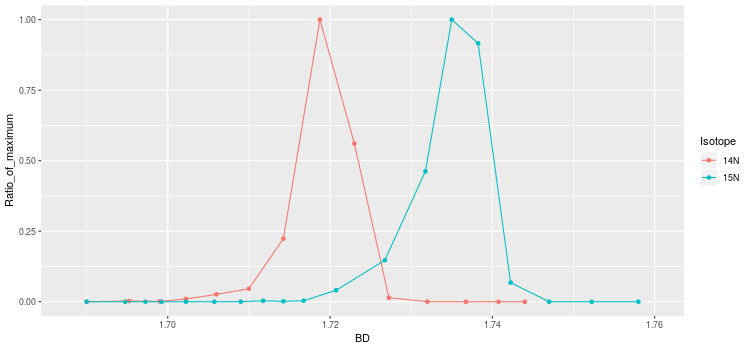

In [39]:
%%R -h 350 -w 750

SIPSim2.plot = ggplot(data=metaSIPSim.df, aes(x=BD, y=Ratio_of_maximum, color=Isotope)) +
    geom_point() +
    geom_line() +
    xlim(1.688, 1.76)
SIPSim2.plot

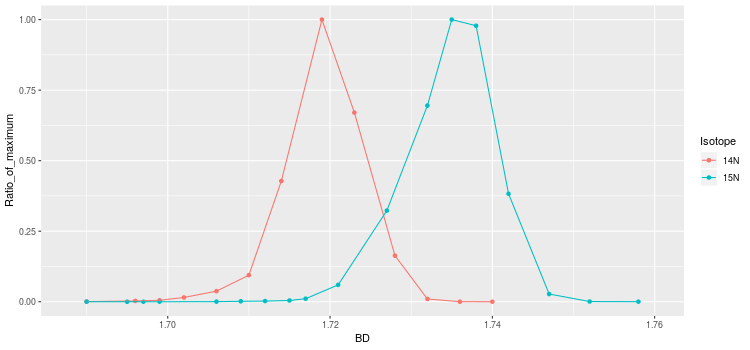

In [40]:
%%R -h 350 -w 750

SIPSim.plot = ggplot(data=SIPSim.df, aes(x=BD, y=Ratio_of_maximum, color=Isotope)) +
    geom_point() +
    geom_line() +
    xlim(1.688, 1.76)
SIPSim.plot

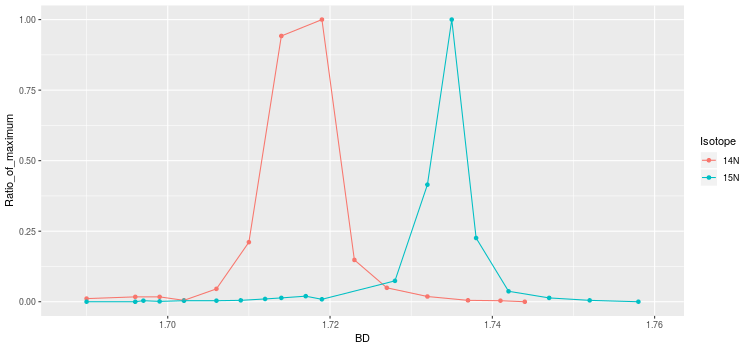

In [41]:
%%R -h 350 -w 750
real.plot = ggplot(data=real.df, aes(x=BD, y=Ratio_of_maximum, color=Isotope)) +
    geom_point() +
    geom_line() +
    xlim(1.688, 1.76)

real.plot

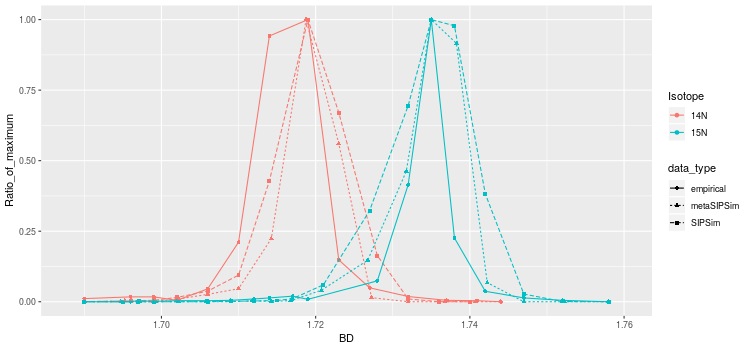

In [42]:
%%R -h 350 -w 750
full.plot = ggplot(data=full.df, aes(x=BD, y=Ratio_of_maximum, color=Isotope, 
                                     shape=data_type, linetype=data_type)) +
    geom_point() +
    geom_line() +
    xlim(1.688, 1.76)

full.plot

### Thats also pretty good

